# **SESSION 1 (DATE - 02/02/26)** 

# Exploratory Data Analysis – Walmart Dataset
## Objective
To explore Walmart weekly sales data and understand trends,
patterns, and factors affecting sales.

**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**LOAD DATA**

In [2]:
df = pd.read_csv("/content/Walmart Data Analysis and Forcasting.csv")

**PREVIEW OF DATASET**

First 5 rows

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,"$16,43,690.90",0,42.31,$2.57,211.096358,8.106
1,1,12-02-2010,"$16,41,957.44",1,38.51,$2.55,211.242170,8.106
2,1,19-02-2010,"$16,11,968.17",0,39.93,$2.51,211.289143,8.106
3,1,26-02-2010,"$14,09,727.59",0,46.63,$2.56,211.319643,8.106
4,1,05-03-2010,"$15,54,806.68",0,46.50,$2.63,211.350143,8.106


Last 5 rows

In [4]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,"$7,13,173.95",0,64.88,$4.00,192.013558,8.684
6431,45,05-10-2012,"$7,33,455.07",0,64.89,$3.99,192.170412,8.667
6432,45,12-10-2012,"$7,34,464.36",0,54.47,$4.00,192.327265,8.667
6433,45,19-10-2012,"$7,18,125.53",0,56.47,$3.97,192.330854,8.667
6434,45,26-10-2012,"$7,60,281.43",0,58.85,$3.88,192.308899,8.667


Number of rows & columns

In [5]:
df.shape

(6435, 8)

Column names

In [6]:
df.columns

Index(['Store', 'Date', ' Weekly_Sales ', 'Holiday_Flag', 'Temperature',
       ' Fuel_Price ', 'CPI', 'Unemployment'],
      dtype='object')

Full info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store           6435 non-null   int64  
 1   Date            6435 non-null   object 
 2    Weekly_Sales   6435 non-null   object 
 3   Holiday_Flag    6435 non-null   int64  
 4   Temperature     6435 non-null   float64
 5    Fuel_Price     6435 non-null   object 
 6   CPI             6435 non-null   float64
 7   Unemployment    6435 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 402.3+ KB


# **SESSION 2 (DATE - 05/02/26)**

**CLEANING DATA**

**A) Fix Column Names**

Remove spaces before/after column names

In [8]:
df.columns = df.columns.str.strip()

Check updated column names

In [9]:
print(df.columns)

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


**B) Convert Weekly_Sales to Numeric**

Check the values first

In [10]:
df["Weekly_Sales"].head()

0     $16,43,690.90 
1     $16,41,957.44 
2     $16,11,968.17 
3     $14,09,727.59 
4     $15,54,806.68 
Name: Weekly_Sales, dtype: object

Remove $ symbol and commas

In [11]:
df["Weekly_Sales"] = df["Weekly_Sales"].str.replace("$", "", regex=False)
df["Weekly_Sales"] = df["Weekly_Sales"].str.replace(",", "", regex=False)

Convert to numeric (float)

In [12]:
df["Weekly_Sales"] = pd.to_numeric(df["Weekly_Sales"])

**C) Convert Fuel_Price to Numeric**

Check values

In [13]:
df["Fuel_Price"].head()

0     $2.57 
1     $2.55 
2     $2.51 
3     $2.56 
4     $2.63 
Name: Fuel_Price, dtype: object

Remove $ symbol

In [14]:
df["Fuel_Price"] = df["Fuel_Price"].str.replace("$", "", regex=False)

Convert to numeric

In [15]:
df["Fuel_Price"] = pd.to_numeric(df["Fuel_Price"])

**D) Convert Date Column into Proper Date Format**

Convert to datetime:

In [16]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")

**E) Check & Handle Data Issues**

1. Check Missing Values

Count Missing Values in Each Column

In [17]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Total Missing Values in Dataset

In [18]:
df.isnull().sum().sum()

0

2. Handling Missing Values

Option 1: Drop rows that contain missing values

In [19]:
df = df.dropna()

Option 2: Fill missing values

Eg: Fill numeric columns with mean

In [20]:
df["CPI"] = df["CPI"].fillna(df["CPI"].mean())
df["Unemployment"] = df["Unemployment"].fillna(df["Unemployment"].mean())

Eg: Fill missing values with 0


In [21]:
df = df.fillna(0)

**Check Duplicate Rows**

Count Duplicate Rows

In [22]:
df.duplicated().sum()

0

View Duplicate Rows (if any)

In [23]:
df[df.duplicated()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


Remove Duplicate Rows (if any)

In [24]:
df = df.drop_duplicates()

# **SESSION 3 (DATE - 06/02/26)**

**DESCRIPTIVE STATISTICS**

**Summary statistics**

In [25]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.359122,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.470000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.930000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.450000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.740000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.470000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.458903,39.356712,1.875885


Find mean of a column

In [26]:
df['Weekly_Sales'].mean()

1046964.8775617715

Maximum value of a column

In [27]:
df['Weekly_Sales'].max()

3818686.45

Minimum value of a column

In [28]:
df['Weekly_Sales'].min()

209986.25

**GROUPING & AGGREGATION**

**Average sales by store**

In [29]:
df.groupby("Store")["Weekly_Sales"].mean()

Store
1     1.555264e+06
2     1.925751e+06
3     4.027044e+05
4     2.094713e+06
5     3.180118e+05
6     1.564728e+06
7     5.706173e+05
8     9.087495e+05
9     5.439806e+05
10    1.899425e+06
11    1.356383e+06
12    1.009002e+06
13    2.003620e+06
14    2.020978e+06
15    6.233125e+05
16    5.192477e+05
17    8.935814e+05
18    1.084718e+06
19    1.444999e+06
20    2.107677e+06
21    7.560691e+05
22    1.028501e+06
23    1.389864e+06
24    1.356755e+06
25    7.067215e+05
26    1.002912e+06
27    1.775216e+06
28    1.323522e+06
29    5.394514e+05
30    4.385796e+05
31    1.395901e+06
32    1.166568e+06
33    2.598617e+05
34    9.667816e+05
35    9.197250e+05
36    3.735120e+05
37    5.189003e+05
38    3.857317e+05
39    1.450668e+06
40    9.641280e+05
41    1.268125e+06
42    5.564039e+05
43    6.333247e+05
44    3.027489e+05
45    7.859814e+05
Name: Weekly_Sales, dtype: float64

**Total sales by store**

In [30]:
df.groupby("Store")["Weekly_Sales"].sum()

Store
1     2.224028e+08
2     2.753824e+08
3     5.758674e+07
4     2.995440e+08
5     4.547569e+07
6     2.237561e+08
7     8.159828e+07
8     1.299512e+08
9     7.778922e+07
10    2.716177e+08
11    1.939628e+08
12    1.442872e+08
13    2.865177e+08
14    2.889999e+08
15    8.913368e+07
16    7.425243e+07
17    1.277821e+08
18    1.551147e+08
19    2.066349e+08
20    3.013978e+08
21    1.081179e+08
22    1.470756e+08
23    1.987506e+08
24    1.940160e+08
25    1.010612e+08
26    1.434164e+08
27    2.538559e+08
28    1.892637e+08
29    7.714155e+07
30    6.271689e+07
31    1.996139e+08
32    1.668192e+08
33    3.716022e+07
34    1.382498e+08
35    1.315207e+08
36    5.341221e+07
37    7.420274e+07
38    5.515963e+07
39    2.074455e+08
40    1.378703e+08
41    1.813419e+08
42    7.956575e+07
43    9.056544e+07
44    4.329309e+07
45    1.123953e+08
Name: Weekly_Sales, dtype: float64

# **SESSION 4 (DATE -09/02/26)**

**VISUALIZATIONS**

**Line chart**

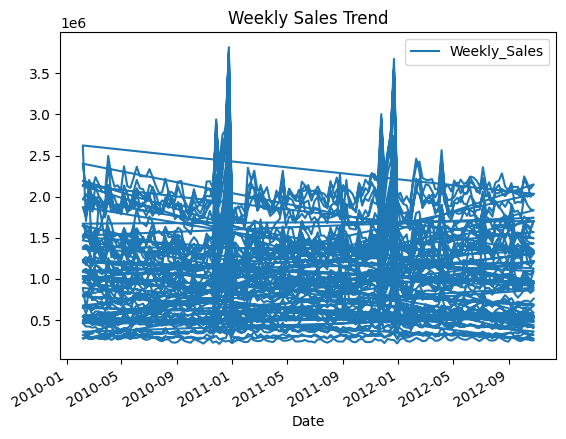

In [31]:
df.plot(x="Date", y="Weekly_Sales")
plt.title("Weekly Sales Trend")
plt.show()

**Bar chart**

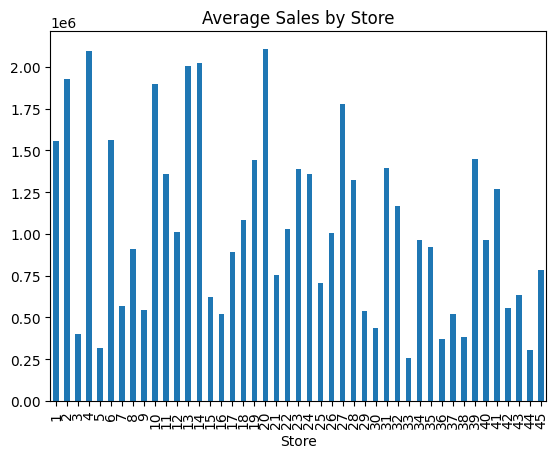

In [32]:
df.groupby("Store")["Weekly_Sales"].mean().plot(kind="bar")
plt.title("Average Sales by Store")
plt.show()

**Histogram**

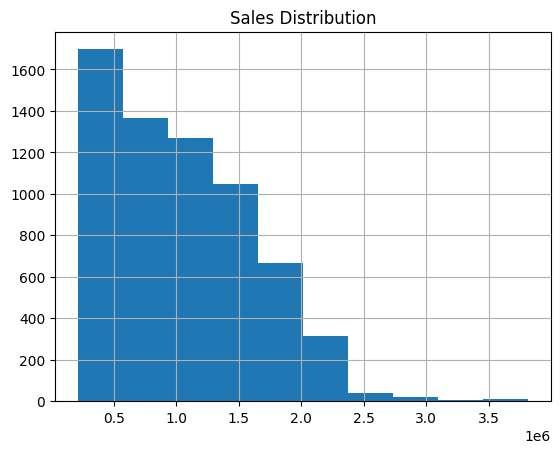

In [33]:
df["Weekly_Sales"].hist()
plt.title("Sales Distribution")
plt.show()

**Scatter plot**

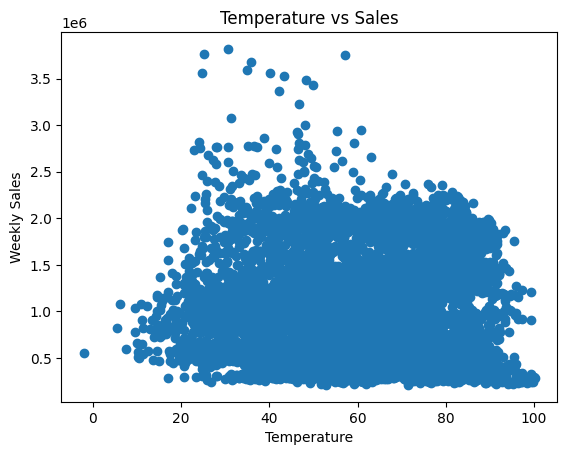

In [34]:
plt.scatter(df["Temperature"], df["Weekly_Sales"])
plt.title("Temperature vs Sales")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.show()

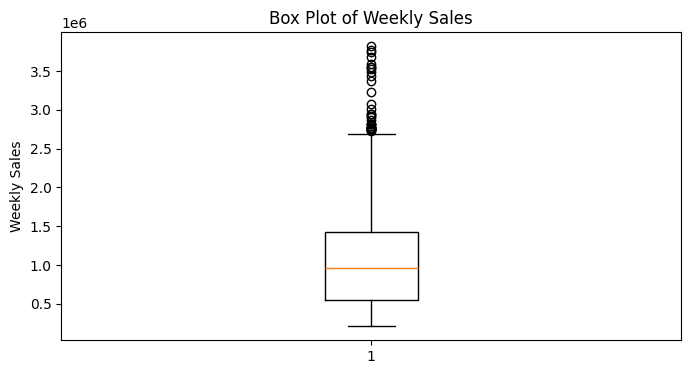

In [35]:
plt.figure(figsize=(8, 4))
plt.boxplot(df["Weekly_Sales"])
plt.title("Box Plot of Weekly Sales")
plt.ylabel("Weekly Sales")
plt.show()


# **Relationships Between Variables**

**Correlation Matrix**

In [36]:
cols = ["Weekly_Sales", "Fuel_Price", "Temperature", "CPI", "Unemployment"]

corr_matrix = df[cols].corr()
corr_matrix

,Weekly_Sales,Fuel_Price,Temperature,CPI,Unemployment
Weekly_Sales,1.000000,0.009483,-0.063810,-0.072634,-0.106176
Fuel_Price,0.009483,1.000000,0.144878,-0.170514,-0.034889
Temperature,-0.063810,0.144878,1.000000,0.176888,0.101158
CPI,-0.072634,-0.170514,0.176888,1.000000,-0.302020
Unemployment,-0.106176,-0.034889,0.101158,-0.302020,1.000000


Students Should Interpret Correlation

+ve correlation → both variables move in the same direction

-ve correlation → one increases while the other decreases

Closer to 0 → very weak / no linear relationship

Closer to ±1 → strong relationship

In [37]:
df["Weekly_Sales"].corr(df["Fuel_Price"])

0.00948349757678148

# **SESSION 5 (DATE -13/02/26)**

## Key Insights
1. Seasonal Patterns Observed – Sales tend to increase during holiday seasons and special events.
2. Consistent Growth Over Time – Overall sales show a gradual upward trend across years.
3. Store-wise Variation – Some stores consistently outperform others due to location and demand differences.
4. Holiday & Promotional Events – Sales increase during festive seasons and discount offers.
5. External Economic Factors – Fuel price, CPI, and unemployment rate can impact consumer spending.
6. Store Characteristics – Store size, location, and regional demand influence performance.



## Conclusion
What did we learn about Walmart’s sales trend?
Answer:
Walmart’s sales demonstrate a clear seasonal pattern with steady long-term growth. Holiday periods significantly boost revenue, and performance varies across stores, indicating that both time-based and location-based factors influence sales trends.

## Conclusion
Which factors might affect sales?
Answer:
Sales are influenced by a combination of seasonal events, economic conditions, and store-specific factors. Understanding these variables helps in better forecasting, strategic planning, and inventory management.